In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [8]:
df = pd.read_csv('C:\\Users\\jk\\Desktop\\data science - infoshare\\projekt_SQL\\jdszr4-edc\\2-projekt-python\\dataset-normalized.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,True,1,1102,0,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,False,2,279,1,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,True,1,1373,1,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,False,2,1392,1,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,False,1,591,1,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,False,2,884,1,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,False,1,613,1,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,False,1,155,1,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,False,2,1023,0,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


# Total Working Years

In [9]:
total_working_years_dict = dict(df.TotalWorkingYears.value_counts())
total_working_years_dict

{10: 202,
 6: 125,
 8: 103,
 9: 96,
 5: 88,
 1: 81,
 7: 81,
 4: 63,
 12: 48,
 3: 42,
 15: 40,
 16: 37,
 13: 36,
 11: 36,
 21: 34,
 17: 33,
 14: 31,
 2: 31,
 20: 30,
 18: 27,
 19: 22,
 23: 22,
 22: 21,
 24: 18,
 25: 14,
 28: 14,
 26: 14,
 0: 11,
 29: 10,
 31: 9,
 32: 9,
 27: 7,
 30: 7,
 33: 7,
 36: 6,
 34: 5,
 37: 4,
 35: 3,
 40: 2,
 38: 1}

In [10]:
departments_dict = dict(df.Department.value_counts())
departments_dict

{1: 961, 0: 446, 2: 63}

In [11]:
departments = departments_dict.keys()
departments

dict_keys([1, 0, 2])

In [14]:
df.index = pd.cut(df.TotalWorkingYears, bins=range(0,48,8))
print(df.index)

CategoricalIndex([  (0, 8],  (8, 16],   (0, 8],   (0, 8],   (0, 8],   (0, 8],
                   (8, 16],   (0, 8],  (8, 16], (16, 24],
                  ...
                    (0, 8], (16, 24], (16, 24],  (8, 16],   (0, 8], (16, 24],
                   (8, 16],   (0, 8], (16, 24],   (0, 8]],
                 categories=[(0, 8], (8, 16], (16, 24], (24, 32], (32, 40]], ordered=True, name='TotalWorkingYears', dtype='category', length=1470)


In [15]:
total_working_years_dict1 = dict(df.index.value_counts())
total_working_years_dict1

{Interval(0, 8, closed='right'): 614,
 Interval(8, 16, closed='right'): 526,
 Interval(16, 24, closed='right'): 207,
 Interval(24, 32, closed='right'): 84,
 Interval(32, 40, closed='right'): 28}

In [16]:
total_working_years_list = total_working_years_dict1.keys()
total_working_years_list

dict_keys([Interval(0, 8, closed='right'), Interval(8, 16, closed='right'), Interval(16, 24, closed='right'), Interval(24, 32, closed='right'), Interval(32, 40, closed='right')])

In [491]:
total_working_years_list = total_working_years_dict1.keys()
total_working_years_list

def plot_total_working_years_salary_dep(s: int, total_working_years: int, department: str):
    
    for i in total_working_years_list:
        if total_working_years in i:
            total_working_years_total = i
    total_years_dict = dict(df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department)]['MonthlyIncome'].describe())
            
    employees = total_years_dict['count']
    less = df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department) & (df['MonthlyIncome'] < s)]['MonthlyIncome'].count()
    more = df[(df['TotalWorkingYears'] .between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department) & (df['MonthlyIncome'] > s)]['MonthlyIncome'].count()
    less_p = round(100 * less / employees, 2)
    more_p = round(100 * more / employees, 2)
    print(f'{less_p}% people having total experience in range of {i} years and working in department {department} earn less than you, {more_p}% of them have higher monthly income.')
    
    var = st.variation(df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department)]['MonthlyIncome'])
    
    if var > 0.10 and total_years_dict['count'] >= 15:
        
        if s <= total_years_dict['25%']:
            salary = df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department) & 
                        (df['MonthlyIncome'] <= total_years_dict['25%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to first quartile.'
        elif s <= total_years_dict['50%']:
            salary = df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department) & 
                        (df['MonthlyIncome'] <= total_years_dict['50%']) & (df['MonthlyIncome'] > total_years_dict['25%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to second quartile.'
        elif s <= total_years_dict['75%']:
            salary = df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department) & 
                        (df['MonthlyIncome'] <= total_years_dict['75%']) & (df['MonthlyIncome'] > total_years_dict['50%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to third quartile.'
        else:
            salary = df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department) & 
                        (df['MonthlyIncome'] > total_years_dict['75%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to fourth quartile.'
        
  
        plt.subplots(figsize=(8, 10))
       
        plt.subplot(211)
        sns.histplot(data=salary, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(plot_title)
        
        plt.subplot(212)
        exp_salary = df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department)]['MonthlyIncome']
        gen_title = print('Your monthly income compared to all of the employees with total experience in the same range of total working years and working in your department.')
        sns.histplot(data=exp_salary, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)
    
    else:
        print(f'Not enough employees in database to plot a comparison. Comparing now to all of the employees having experince in the same range {i} of total working years.')
        
        exp_salary = df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right))]['MonthlyIncome']
        gen_title = 'Your salary compared to all of the employees with your experience.'
        sns.histplot(data=exp_salary, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)

68.22% people having total experience in range of (32, 40] years and working in department 1 earn less than you, 31.54% of them have higher monthly income.
Your monthly income compared to all of the employees with total experience in the same range of total working years and working in your department.


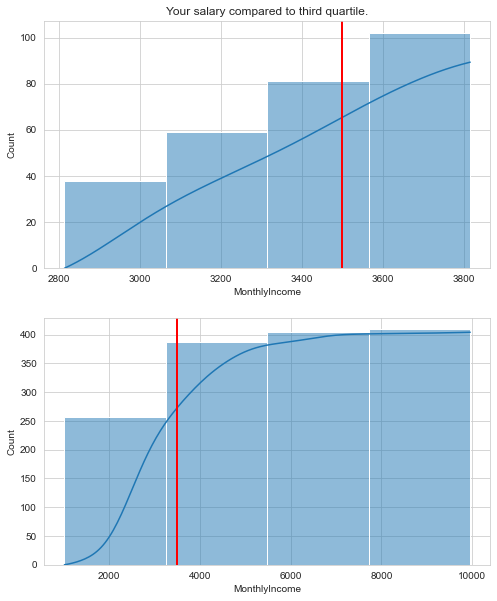

In [492]:
plot_total_working_years_salary_dep(3500, 8, 1)

In [493]:
#JOB LEVEL
   
def plot_total_working_years_job_level_dep(JL: int, total_working_years: int, department: int):
    for i in total_working_years_list:
        if total_working_years in i:
            total_working_years_total = i
            
    total_years_dict = dict(df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department)]['JobLevel'].describe())
            
    employees = total_years_dict['count']
    less = df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department) & (df['JobLevel'] < JL)]['JobLevel'].count()
    more = df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department) & (df['JobLevel'] > JL)]['JobLevel'].count()
    less_p = round(100 * less / employees,2)
    more_p = round(100 * more / employees,2)
    print(f'{less_p} % people having total experience in range of {total_working_years_total} years and working in department {department} are on higher job level, {more_p}% of them works on lower job level.')
    
    var = st.variation(df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department)]['JobLevel'])
    
    if var > 0.1 and total_years_dict['count'] >= 15:
        if JL <= total_years_dict['25%']:
            job_lvl = df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department) & 
                        (df['JobLevel'] <= total_years_dict['25%'])]['JobLevel']
            plot_title = 'Your job level compared to first quartile.'
        elif JL <= total_years_dict['50%']:
            job_lvl = df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department) & 
                        (df['JobLevel'] <= total_years_dict['50%']) & (df['JobLevel'] > total_years_dict['25%'])]['JobLevel']
            plot_title = 'Your job level compared to second quartile.'
        elif JL <= total_years_dict['75%']:
            job_lvl = df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department) & 
                        (df['JobLevel'] <= total_years_dict['75%']) & (df['JobLevel'] > total_years_dict['50%'])]['JobLevel']
            plot_title = 'Your job level compared to third quartile.'
        else:
            job_lvl = df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department) & 
                        (df['JobLevel'] > total_years_dict['75%'])]['JobLevel']
            plot_title = 'Your job level compared to fourth quartile.'
        
  
        plt.figure(figsize=(6, 4))
        sns.set_style('whitegrid')
        sns.countplot(x='JobLevel', data=df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department)], palette='cool')
        plt.title(f'Job Level across employees working for {total_working_years} years in department {department}.')
        
    else:
        plt.figure(figsize=(6, 4))
        sns.set_style('whitegrid')
        sns.countplot(x='JobLevel', data=df[df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)], palette='cool')
        print(f'Sorry, we do not have enough data to plot job level statistics for your department.\nNow showing general statistics for employees working for {i} years.')
    plt.show()

84.6 % people having total experience in range of (0, 8] years and working in department 1 are on higher job level, 0.0% of them works on lower job level.


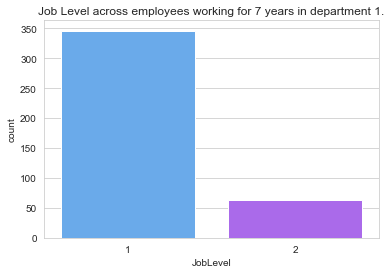

In [341]:
plot_total_working_years_job_level(2, 7, 1)

In [496]:
# SATISFACTION


def plot_satisfaction_totalyears_dep(js: int, rs: int, es:int, total_working_years: int, department: int):
    for i in total_working_years_list:
        if total_working_years in i:
            total_working_years_total = i
            
    dfx = df[(df['TotalWorkingYears'].between(total_working_years_total.left, total_working_years_total.right)) & (df['Department'] == department)]
    job_sat_col = dfx['JobSatisfaction'].mean()
    relationship_sat_col = dfx['RelationshipSatisfaction'].mean()
    environment_sat_col = dfx['EnvironmentSatisfaction'].mean()
    
    job_sat_you = js
    relationship_sat_you = rs
    environment_sat_you = es     
    if len(dfx) >2:
        plt.figure(figsize=(8, 6))   
        w=0.2
        x = ['job satisfaction', 'relationship satisfaction', 'environment satisafction']
        you = [job_sat_you, relationship_sat_you, environment_sat_you]
        others = [job_sat_col, relationship_sat_col, environment_sat_col]
          
        bar1 = np.arange(len(x))
        bar2 = [i+w for i in bar1]

        plt.bar(bar1, you, w, label= 'you')
        plt.bar(bar2, others, w, label='others')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        plt.ylabel('Satsifaction Level')
        plt.xlabel('Satisfaction')
        plt.title('Your satisfaction levels compared to average satisfaction levels of people having total experience in the range same as you and working in the same department')
        plt.xticks(bar1+w/2, x)
        plt.legend()
        plt.show()
    else:
        print('Not enough data to show comparison')

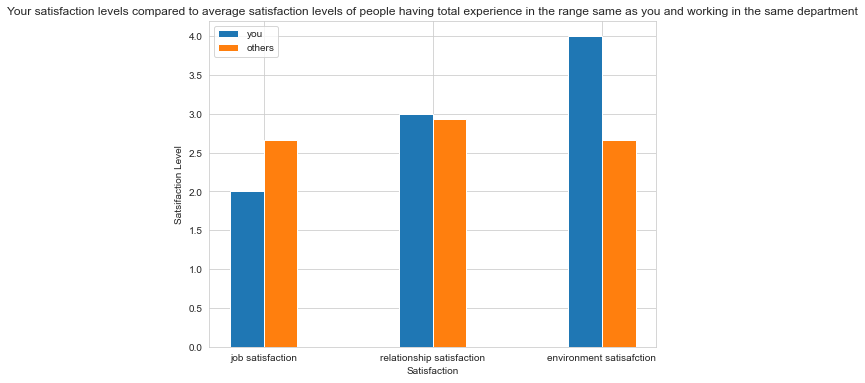

In [497]:
plot_satisfaction_totalyears_dep(2, 3, 4, 8, 2)

In [414]:
plot_satisfaction_totalyears(2, 3, 4, 21, 3)

Not enough data


# YEARS IN CURRENT ROLE

In [147]:
years_in_curr_role_dict = dict(df.YearsInCurrentRole.value_counts())
years_in_curr_role_dict

{2: 372,
 0: 244,
 7: 222,
 3: 135,
 4: 104,
 8: 89,
 9: 67,
 1: 57,
 6: 37,
 5: 36,
 10: 29,
 11: 22,
 13: 14,
 14: 11,
 12: 10,
 15: 8,
 16: 7,
 17: 4,
 18: 2}

In [148]:
departments_dict = dict(df.Department.value_counts())
departments_dict

{1: 961, 0: 446, 2: 63}

In [151]:
df.index = pd.cut(df.YearsInCurrentRole, bins=range(0,19,3))
print(df.index)

CategoricalIndex([(3.0, 6.0], (6.0, 9.0],        nan, (6.0, 9.0], (0.0, 3.0],
                  (6.0, 9.0],        nan,        nan, (6.0, 9.0], (6.0, 9.0],
                  ...
                      (3, 6],     (0, 3],     (6, 9],     (3, 6],     (0, 3],
                      (0, 3],     (6, 9],     (0, 3],     (3, 6],     (0, 3]],
                 categories=[(0, 3], (3, 6], (6, 9], (9, 12], (12, 15], (15, 18]], ordered=True, name='YearsInCurrentRole', dtype='category', length=1470)


In [152]:
years_in_curr_role_dict = dict(df.index.value_counts())
years_in_curr_role_dict

{Interval(0, 3, closed='right'): 564,
 Interval(6, 9, closed='right'): 378,
 Interval(3, 6, closed='right'): 177,
 Interval(9, 12, closed='right'): 61,
 Interval(12, 15, closed='right'): 33,
 Interval(15, 18, closed='right'): 13}

In [153]:
years_in_curr_role_list = years_in_curr_role_dict.keys()
years_in_curr_role_list

dict_keys([Interval(0, 3, closed='right'), Interval(6, 9, closed='right'), Interval(3, 6, closed='right'), Interval(9, 12, closed='right'), Interval(12, 15, closed='right'), Interval(15, 18, closed='right')])

In [531]:
# Miesięczny przychód dla osób o danym doświadczeniu na obecnym stanowisku dla departamentu


def plot_years_in_curr_role_salary_dep(s: int, years_in_curr_role: int, department: str):
    for i in years_in_curr_role_list:
        if years_in_curr_role in i:
            years_in_curr_role_total = i
    years_in_curr_role_dict = dict(df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department)]['MonthlyIncome'].describe())
            
    employees =  years_in_curr_role_dict['count']
    less = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department) & (df['MonthlyIncome'] < s)]['MonthlyIncome'].count()
    more = df[(df['YearsInCurrentRole'] .between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department) & (df['MonthlyIncome'] > s)]['MonthlyIncome'].count()
    less_p = round(100 * less / employees, 2)
    more_p = round(100 * more / employees, 2)
    print(f'{less_p}% people having exeprience in current role in range of {i} years and working in department {department} earn less than you, {more_p}% of them have higher monthly income.')
    
    var = st.variation(df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department)]['MonthlyIncome'])
    
    if var > 0.10 and  years_in_curr_role_dict['count'] >= 15:
        
        if s <=  years_in_curr_role_dict['25%']:
            salary = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department) & 
                        (df['MonthlyIncome'] <= years_in_curr_role_dict['25%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to first quartile.'
        elif s <=  years_in_curr_role_dict['50%']:
            salary = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department) & 
                        (df['MonthlyIncome'] <= years_in_curr_role_dict['50%']) & (df['MonthlyIncome'] > years_in_curr_role_dict['25%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to second quartile.'
        elif s <=  years_in_curr_role_dict['75%']:
            salary = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department) & 
                        (df['MonthlyIncome'] <= years_in_curr_role_dict['75%']) & (df['MonthlyIncome'] > years_in_curr_role_dict['50%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to third quartile.'
        else:
            salary = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department) & 
                        (df['MonthlyIncome'] > years_in_curr_role_dict['75%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to fourth quartile.'
        
  
        plt.subplots(figsize=(8, 10))
       
        plt.subplot(211)
        sns.histplot(data=salary, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(plot_title)
        
        plt.subplot(212)
        exp_salary = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department)]['MonthlyIncome']
        gen_title = print('Your monthly income compared to all of the employees with experience in current role in the same range and working in your department.')
        sns.histplot(data=exp_salary, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)
    
    else:
        print(f'Not enough employees in database to plot a comparison. Comparing now to all of the employees having experince in the same range of {i} years.')
        
        exp_salary = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right))]['MonthlyIncome']
        gen_title = 'Your salary compared to all of the employees with experience in current role in the same range of {i} years.'
        sns.histplot(data=exp_salary, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)

17.83% people having exeprience in current role in range of (15, 18] years and working in department 1 earn less than you, 82.17% of them have higher monthly income.
Your monthly income compared to all of the employees with experience in current role in the same range and working in your department.


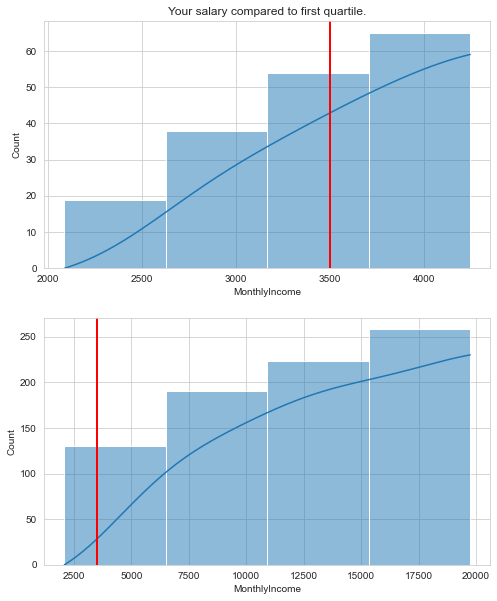

In [532]:
plot_years_in_curr_role_salary_dep(3500, 8, 1)

In [500]:
#Na jakim poziomie job level znajdują sie osoby o tym samym doświadczeniu na obecnym stanowisku w tym samym departamencie

def plot_years_in_curr_role_job_level_dep(JL: int, years_in_curr_role: int, department: int):
    for i in years_in_curr_role_list:
        if years_in_curr_role in i:
            years_in_curr_role_total = i
            
    years_in_curr_role_dict = dict(df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department)]['JobLevel'].describe())
            
          
    employees = years_in_curr_role_dict['count']
    less = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department) & (df['JobLevel'] < JL)]['JobLevel'].count()
    more = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department) & (df['JobLevel'] > JL)]['JobLevel'].count()
    less_p = round(100 * less / employees,2)
    more_p = round(100 * more / employees,2)
    print(f'{less_p} % people having experience in their current role in range of {i} years and working in department {department} are on higher job level, {more_p}% of them works on lower job level.')
    
    var = st.variation(df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department)]['JobLevel'])
    
    if var > 0.1 and years_in_curr_role_dict['count'] >= 15:
        if JL <= years_in_curr_role_dict['25%']:
            job_lvl = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department) & 
                        (df['JobLevel'] <= years_in_curr_role_dict['25%'])]['JobLevel']
            plot_title = 'Your job level compared to first quartile.'
        elif JL <= years_in_curr_role_dict['50%']:
            job_lvl = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department) & 
                        (df['JobLevel'] <= tyears_in_curr_role_dict['50%']) & (df['JobLevel'] > years_in_curr_role_dict['25%'])]['JobLevel']
            plot_title = 'Your job level compared to second quartile.'
        elif JL <= years_in_curr_role_dict['75%']:
            job_lvl = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department) & 
                        (df['JobLevel'] <= years_in_curr_role_dict['75%']) & (df['JobLevel'] > years_in_curr_role_dict['50%'])]['JobLevel']
            plot_title = 'Your job level compared to third quartile.'
        else:
            job_lvl = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department) & 
                        (df['JobLevel'] > years_in_curr_role_dict['75%'])]['JobLevel']
            plot_title = 'Your job level compared to fourth quartile.'
        
  
        plt.figure(figsize=(6, 4))
        sns.set_style('whitegrid')
        sns.countplot(x='JobLevel', data=df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['Department'] == department)], palette='cool')
        plt.title(f'Job Level across employees working for {years_in_curr_role} years in current role in department {department}.')
        
    else:
        plt.figure(figsize=(6, 4))
        sns.set_style('whitegrid')
        sns.countplot(x='JobLevel', data=df[df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)], palette='cool')
        print(f'Sorry, we do not have enough data to plot job level statistics for your department.\nNow showing general statistics for employees working for {i} years in current role.')
    plt.show()

12.79 % people having experience in their current role in range of (15, 18] years and working in department 1 are on higher job level, 51.16% of them works on lower job level.


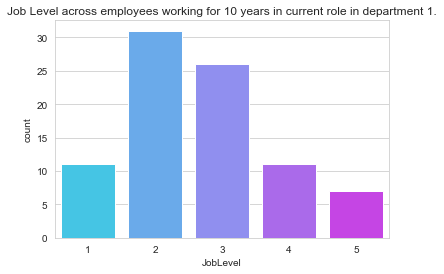

In [501]:
plot_years_in_curr_role_job_level_dep(2, 10, 1)

In [423]:
# Poziom satysfakcji wg doświadczenia na obecnym stanowisku i w danym departamanecie


def plot_satisfaction_years_in_curr_role_Dep(js: int, rs: int, es:int, years_in_curr_role: int, department: int):
    for i in years_in_curr_role_list:
        if years_in_curr_role in i:
            years_in_curr_role_total = i
            
    dfc = df[(df['YearsInCurrentRole'].between( years_in_curr_role_total.left,  years_in_curr_role_total.right)) & (df['Department'] == department)]
    job_sat_col = dfc['JobSatisfaction'].mean()
    relationship_sat_col = dfc['RelationshipSatisfaction'].mean()
    environment_sat_col = dfc['EnvironmentSatisfaction'].mean()
    
    job_sat_you = js
    relationship_sat_you = rs
    environment_sat_you = es     
    
    if len(dfx) >2:
        plt.figure(figsize=(8, 6))   
        w=0.2
        x = ['job satisfaction', 'relationship satisfaction', 'environment satisafction']
        you = [job_sat_you, relationship_sat_you, environment_sat_you]
        others = [job_sat_col, relationship_sat_col, environment_sat_col]
          
        bar1 = np.arange(len(x))
        bar2 = [i+w for i in bar1]

        plt.bar(bar1, you, w, label= 'you')
        plt.bar(bar2, others, w, label='others')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        plt.ylabel('Satsifaction Level')
        plt.xlabel('Satisfaction')
        plt.title('Your satisfaction levels compared to average satisfaction levels of people having having the same experience in current role and working in the same department')
        plt.xticks(bar1+w/2, x)
        plt.legend()
        plt.show()
    else:
        print('Not enough data to show comparison')

In [502]:
plot_satisfaction_totalyears_dep(2, 3, 4, 2, 3)

Not enough data to show comparison


In [504]:
#Wykres pokazujący ile osób o podobnym doświadczeniu na obecnym stanowisku, pracującyh w tym samym departamencie robi nadgodziny
def plot_current_role_overtime_dep(department: int, years_in_curr_role: int):
    for i in years_in_curr_role_list:
        if years_in_curr_role in i:
            years_in_curr_role_total = i
            
    df1 = df[(df['YearsInCurrentRole'].between( years_in_curr_role_total.left,  years_in_curr_role_total.right)) & (df['Department'] == department)]
    
    if df1['OverTime'].count() > 0 and len(df1['OverTime'].unique()) == 2:
        print("Showing OverTime statistics for people with expierinece in current role in same range and working in the same department")
        sns.displot(df1, x= 'YearsInCurrentRole', hue= 'OverTime', hue_order=[True, False])
    else:
        print("Not enough data with expierinece in current role in same range and working in the same department. Showing general data for people with experience in current role within the same range")
        sns.displot(x='YearsInCurrentRole', hue='OverTime', data=df[df['YearsInCurrentRole'] == years_in_curr_role], hue_order=[True, False])

Showing OverTime statistics for people with expierinece in current role in same range and working in the same department


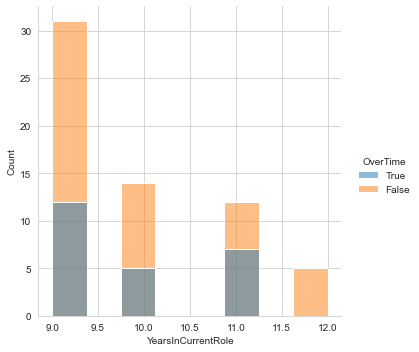

In [505]:
plot_current_role_overtime_dep(1, 10)

In [507]:
# Miesięczny przychód dla osób o danym doświadczeniu na tym samym stanowisku
def plot_years_in_curr_role_position_salary_pos(s: int, years_in_curr_role: int, position: str):
    
    for i in years_in_curr_role_list:
        if years_in_curr_role in i:
            years_in_curr_role_total = i
            
    years_in_curr_role_dict = dict(df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['JobRole'] == position)]['MonthlyIncome'].describe())
            
    employees =  years_in_curr_role_dict['count']
    less = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['JobRole'] == position) & (df['MonthlyIncome'] < s)]['MonthlyIncome'].count()
    more = df[(df['YearsInCurrentRole'] .between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['JobRole'] == position) & (df['MonthlyIncome'] > s)]['MonthlyIncome'].count()
    less_p = round(100 * less / employees, 2)
    more_p = round(100 * more / employees, 2)
    print(f'{less_p}% people having exeprience in current role in range of {i} years and working on the same position {position} earn less than you, {more_p}% of them have higher monthly income.')
    
    var = st.variation(df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['JobRole'] == position)]['MonthlyIncome'])
    
    if var > 0.10 and  years_in_curr_role_dict['count'] >= 15:
        
        if s <=  years_in_curr_role_dict['25%']:
            salary = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['JobRole'] == position) & 
                        (df['MonthlyIncome'] <= years_in_curr_role_dict['25%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to first quartile.'
        elif s <=  years_in_curr_role_dict['50%']:
            salary = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['JobRole'] == position) & 
                        (df['MonthlyIncome'] <= years_in_curr_role_dict['50%']) & (df['MonthlyIncome'] > years_in_curr_role_dict['25%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to second quartile.'
        elif s <=  years_in_curr_role_dict['75%']:
            salary = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['JobRole'] == position) & 
                        (df['MonthlyIncome'] <= years_in_curr_role_dict['75%']) & (df['MonthlyIncome'] > years_in_curr_role_dict['50%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to third quartile.'
        else:
            salary = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['JobRole'] == position) & 
                        (df['MonthlyIncome'] > years_in_curr_role_dict['75%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to fourth quartile.'
        
  
        plt.subplots(figsize=(8, 10))
       
        plt.subplot(211)
        sns.histplot(data=salary, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(plot_title)
        
        plt.subplot(212)
        exp_salary = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['JobRole'] == position)]['MonthlyIncome']
        gen_title = print('Your monthly income compared to all of the employees with experience in current role in the same range and working in on the same position.')
        sns.histplot(data=exp_salary, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)
    
    else:
        print(f'Not enough employees in database to plot a comparison. Comparing now to all of the employees having experince in current orle in the same range of {i} years.')
        
        exp_salary = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right))]['MonthlyIncome']
        gen_title = 'Your salary compared to all of the employees with experience in current role in the same range of {i} years.'
        sns.histplot(data=exp_salary, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)

96.36% people having exeprience in current role in range of (15, 18] years and working on the same position Manufacturing Director earn less than you, 3.64% of them have higher monthly income.
Your monthly income compared to all of the employees with experience in current role in the same range and working in on the same position.


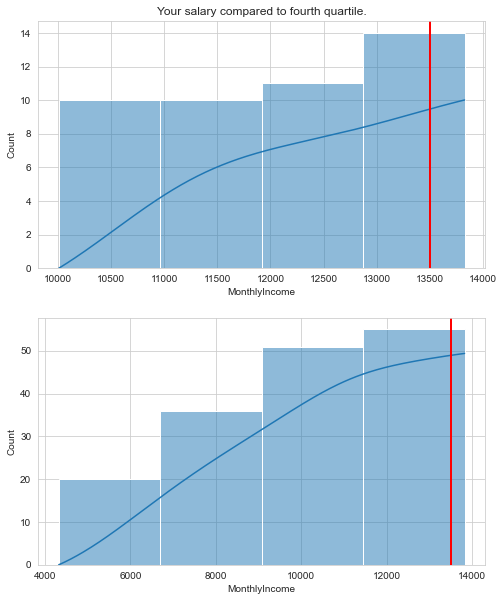

In [508]:
plot_years_in_curr_role_position_salary_pos(13500, 8, 'Manufacturing Director')

In [581]:
# Poziom satysfakcji wg doświadczenia na obecnym stanowisku
def plot_satisfaction_years_in_curr_role_position(js: int, rs: int, es:int, years_in_curr_role: int, position: str):
    for i in years_in_curr_role_list:
        if years_in_curr_role in i:
            years_in_curr_role_total = i
            
    dfs = df[(df['YearsInCurrentRole'].between(years_in_curr_role_total.left, years_in_curr_role_total.right)) & (df['JobRole'] == position)]
    job_sat_col = dfs['JobSatisfaction'].mean()
    relationship_sat_col = dfs['RelationshipSatisfaction'].mean()
    environment_sat_col = dfs['EnvironmentSatisfaction'].mean()
    
    job_sat_you = js
    relationship_sat_you = rs
    environment_sat_you = es     
    
    if len(dfc) >2:
        plt.figure(figsize=(8, 6))   
        w=0.2
        x = ['job satisfaction', 'relationship satisfaction', 'environment satisafction']
        you = [job_sat_you, relationship_sat_you, environment_sat_you]
        others = [job_sat_col, relationship_sat_col, environment_sat_col]
          
        bar1 = np.arange(len(x))
        bar2 = [i+w for i in bar1]

        plt.bar(bar1, you, w, label= 'you')
        plt.bar(bar2, others, w, label='others')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        plt.ylabel('Satsifaction Level')
        plt.xlabel('Satisfaction')
        plt.title('Your satisfaction levels compared to average satisfaction levels of people having having the same experience in current role and working in the same department')
        plt.xticks(bar1+w/2, x)
        plt.legend()
        plt.show()
    else:
        print('Not enough data to show comparison')

In [582]:
plot_satisfaction_years_in_curr_role_position(2,4,3, 19, 'Research Scientist')

UnboundLocalError: local variable 'years_in_curr_role_total' referenced before assignment

In [441]:
#Wykres pokazujący ile osób o podobnym doświadczeniu na obecnym stanowisku, pracującyh w tym samym departamencie robi nadgodziny
def plot_current_role_overtime_position(position: str, years_in_curr_role: int):
    for i in years_in_curr_role_list:
        if years_in_curr_role in i:
            years_in_curr_role_total = i
            
    df1 = df[(df['YearsInCurrentRole'].between( years_in_curr_role_total.left,  years_in_curr_role_total.right)) & (df['JobRole'] == position)]
    
    if df1['OverTime'].count() > 0 and len(df1['OverTime'].unique()) == 2:
        print("Showing OverTime statistics for people with experience on the same position within the same range of years")
        sns.displot(df1, x= 'YearsInCurrentRole', hue= 'OverTime', hue_order=[True, False])
    else:
        print("Not enough data with expierinece in the same range on the same position. Showing general data for people with experience in current role within the same range of years")
        sns.displot(x='YearsInCurrentRole', hue='OverTime', data=df[df['YearsInCurrentRole'] == years_in_curr_role], hue_order=[True, False])

Showing OverTime statistics for people with experience on the same position within the same range of years


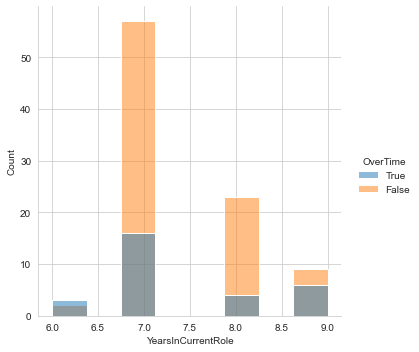

In [442]:
plot_current_role_overtime_position('Sales Executive', 7)

# Years at Company

In [449]:
years_at_company_dict = dict(df.YearsAtCompany.value_counts())
years_at_company_dict

{5: 196,
 1: 171,
 3: 128,
 2: 127,
 10: 120,
 4: 110,
 7: 90,
 9: 82,
 8: 80,
 6: 76,
 0: 44,
 11: 32,
 20: 27,
 13: 24,
 15: 20,
 14: 18,
 22: 15,
 12: 14,
 21: 14,
 18: 13,
 16: 12,
 19: 11,
 17: 9,
 24: 6,
 33: 5,
 25: 4,
 26: 4,
 31: 3,
 32: 3,
 36: 2,
 27: 2,
 29: 2,
 23: 2,
 30: 1,
 34: 1,
 37: 1,
 40: 1}

In [444]:
departments_dict = dict(df.Department.value_counts())
departments_dict

{1: 961, 0: 446, 2: 63}

In [445]:
departments = departments_dict.keys()
departments

dict_keys([1, 0, 2])

In [448]:
df.index = pd.cut(df.YearsAtCompany, bins=range(0,48,8))
print(df.index)

CategoricalIndex([ (0.0, 8.0], (8.0, 16.0],         nan,  (0.0, 8.0],
                   (0.0, 8.0],  (0.0, 8.0],  (0.0, 8.0],  (0.0, 8.0],
                  (8.0, 16.0],  (0.0, 8.0],
                  ...
                       (0, 8],      (0, 8],    (16, 24],     (8, 16],
                       (0, 8],      (0, 8],      (0, 8],      (0, 8],
                      (8, 16],      (0, 8]],
                 categories=[(0, 8], (8, 16], (16, 24], (24, 32], (32, 40]], ordered=True, name='YearsAtCompany', dtype='category', length=1470)


In [450]:
years_at_comp_dict = dict(df.index.value_counts())
years_at_comp_dict

{Interval(0, 8, closed='right'): 978,
 Interval(8, 16, closed='right'): 322,
 Interval(16, 24, closed='right'): 97,
 Interval(24, 32, closed='right'): 19,
 Interval(32, 40, closed='right'): 10}

In [451]:
years_at_comp_list = years_at_comp_dict.keys()
years_at_comp_list

dict_keys([Interval(0, 8, closed='right'), Interval(8, 16, closed='right'), Interval(16, 24, closed='right'), Interval(24, 32, closed='right'), Interval(32, 40, closed='right')])

In [457]:
# Porownanie Income dla Total Years At Company i w danym departamnecie

def plot_years_at_comp_salary_dep(s: int, years_at_comp: int, department: str):
    
    for i in years_at_comp_list:
        if years_at_comp in i:
            years_at_comp_total = i
    years_at_comp_dict = dict(df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department)]['MonthlyIncome'].describe())
            
    employees = years_at_comp_dict['count']
    less = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department) & (df['MonthlyIncome'] < s)]['MonthlyIncome'].count()
    more = df[(df['YearsAtCompany'] .between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department) & (df['MonthlyIncome'] > s)]['MonthlyIncome'].count()
    less_p = round(100 * less / employees, 2)
    more_p = round(100 * more / employees, 2)
    print(f'{less_p}% people working in the company for the range of {i} years and working in department {department} earn less than you, {more_p}% of them have higher monthly income.')
    
    var = st.variation(df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department)]['MonthlyIncome'])
    
    if var > 0.10 and years_at_comp_dict['count'] >= 15:
        
        if s <= years_at_comp_dict['25%']:
            salary = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department) & 
                        (df['MonthlyIncome'] <= years_at_comp_dict['25%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to first quartile.'
        elif s <= years_at_comp_dict['50%']:
            salary = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department) & 
                        (df['MonthlyIncome'] <= years_at_comp_dict['50%']) & (df['MonthlyIncome'] > years_at_comp_dict['25%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to second quartile.'
        elif s <= years_at_comp_dict['75%']:
            salary = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department) & 
                        (df['MonthlyIncome'] <= years_at_comp_dict['75%']) & (df['MonthlyIncome'] > years_at_comp_dict['50%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to third quartile.'
        else:
            salary = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department) & 
                        (df['MonthlyIncome'] > years_at_comp_dict['75%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to fourth quartile.'
        
  
        plt.subplots(figsize=(8, 10))
       
        plt.subplot(211)
        sns.histplot(data=salary, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(plot_title)
        
        plt.subplot(212)
        exp_salary = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department)]['MonthlyIncome']
        gen_title = print('Your monthly income compared to all of the employees working at the company for the same range of years and working in your department.')
        sns.histplot(data=exp_salary, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)
    
    else:
        print(f'Not enough employees in database to plot a comparison. Comparing now to all of the employees working in the company for the same range {i} years.')
        
        exp_salary = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right))]['MonthlyIncome']
        gen_title = 'Your salary compared to all of the employees with your experience.'
        sns.histplot(data=exp_salary, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)

70.52% people working in the company for the range of (32, 40] years and working in department 1 earn less than you, 29.48% of them have higher monthly income.
Your monthly income compared to all of the employees working at the company for the same range of years and working in your department.


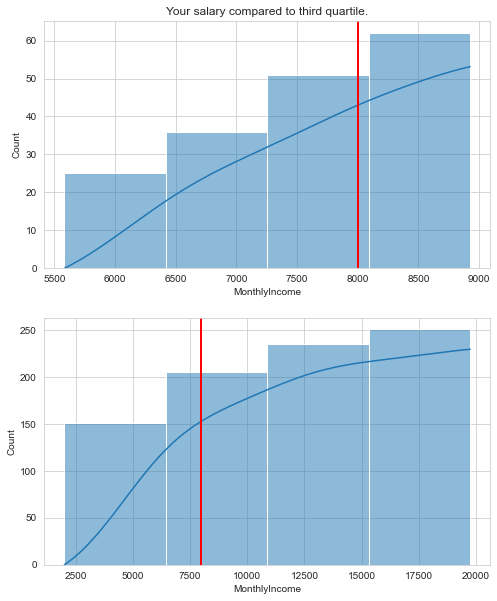

In [458]:
plot_years_at_comp_salary_dep(8000, 10, 1)

In [468]:
#wykres job level dla osób z danym doświadczeniem pracy w firmie i pracującyh w tym samym departamencie

def plot_years_at_comp_job_level_dep(JL: int, years_at_comp: int, department: int):
    for i in years_at_comp_list:
        if years_at_comp in i:
            years_at_comp_total = i
            
    years_at_comp_dict = dict(df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department)]['JobLevel'].describe())
            
          
    employees = years_at_comp_dict['count']
    less = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department) & (df['JobLevel'] < JL)]['JobLevel'].count()
    more = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department) & (df['JobLevel'] > JL)]['JobLevel'].count()
    less_p = round(100 * less / employees,2)
    more_p = round(100 * more / employees,2)
    print(f'{less_p} % people having experience in their current role in range of {years_at_comp_total} years and working in department {department} are on higher job level, {more_p}% of them works on lower job level.')
    
    var = st.variation(df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department)]['JobLevel'])
    
    if var > 0.1 and years_at_comp_dict['count'] >= 15:
        if JL <= years_at_comp_dict['25%']:
            job_lvl = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department) & 
                        (df['JobLevel'] <= years_at_comp_dict['25%'])]['JobLevel']
            plot_title = 'Your job level compared to first quartile.'
        elif JL <= years_at_comp_dict['50%']:
            job_lvl = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department) & 
                        (df['JobLevel'] <= years_at_comp_dict['50%']) & (df['JobLevel'] >years_at_comp_dict['25%'])]['JobLevel']
            plot_title = 'Your job level compared to second quartile.'
        elif JL <= years_at_comp_dict['75%']:
            job_lvl = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department) & 
                        (df['JobLevel'] <=years_at_comp_dict['75%']) & (df['JobLevel'] > years_at_comp_dict['50%'])]['JobLevel']
            plot_title = 'Your job level compared to third quartile.'
        else:
            job_lvl = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department) & 
                        (df['JobLevel'] > years_at_comp_dict['75%'])]['JobLevel']
            plot_title = 'Your job level compared to fourth quartile.'
        
  
        plt.figure(figsize=(6, 4))
        sns.set_style('whitegrid')
        sns.countplot(x='JobLevel', data=df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department)], palette='cool')
        plt.title(f'Job Level across employees working for {years_at_comp} years in current role in department {department}.')
        
    else:
        plt.figure(figsize=(6, 4))
        sns.set_style('whitegrid')
        sns.countplot(x='JobLevel', data=df[df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)], palette='cool')
        print(f'Sorry, we do not have enough data to plot job level statistics for your department.\nNow showing general statistics for employees working for {i} years in current role.')
    plt.show()

0.0 % people having experience in their current role in range of (0, 8] years and working in department 1 are on higher job level, 42.14% of them works on lower job level.


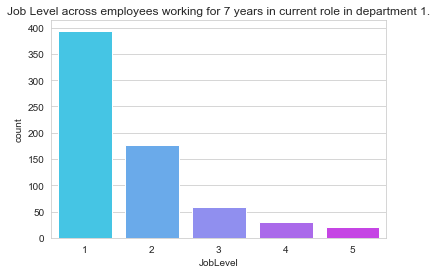

In [469]:
plot_years_at_comp_job_level_dep(1, 7, 1)

In [472]:
#Poziomy staysfakcji dla pracowników o tym samym stażu w firmie i pracujących w tym samym departamencie

def plot_satisfaction_years_at_comp_dep(js: int, rs: int, es:int, years_at_comp: int, department: int):
    for i in years_at_comp_list:
        if years_at_comp in i:
            years_at_comp_total = i
            
    dfc = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department)]
    job_sat_col = dfc['JobSatisfaction'].mean()
    relationship_sat_col = dfc['RelationshipSatisfaction'].mean()
    environment_sat_col = dfc['EnvironmentSatisfaction'].mean()
    
    job_sat_you = js
    relationship_sat_you = rs
    environment_sat_you = es     
    
    if len(dfc) >2:
        plt.figure(figsize=(8, 6))   
        w=0.2
        x = ['job satisfaction', 'relationship satisfaction', 'environment satisafction']
        you = [job_sat_you, relationship_sat_you, environment_sat_you]
        others = [job_sat_col, relationship_sat_col, environment_sat_col]
          
        bar1 = np.arange(len(x))
        bar2 = [i+w for i in bar1]

        plt.bar(bar1, you, w, label= 'you')
        plt.bar(bar2, others, w, label='others')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        plt.ylabel('Satsifaction Level')
        plt.xlabel('Satisfaction')
        plt.title('Your satisfaction levels compared to average satisfaction levels of people having having the same experience in current role and working in the same department')
        plt.xticks(bar1+w/2, x)
        plt.legend()
        plt.show()
    else:
        print('Not enough data to show comparison')

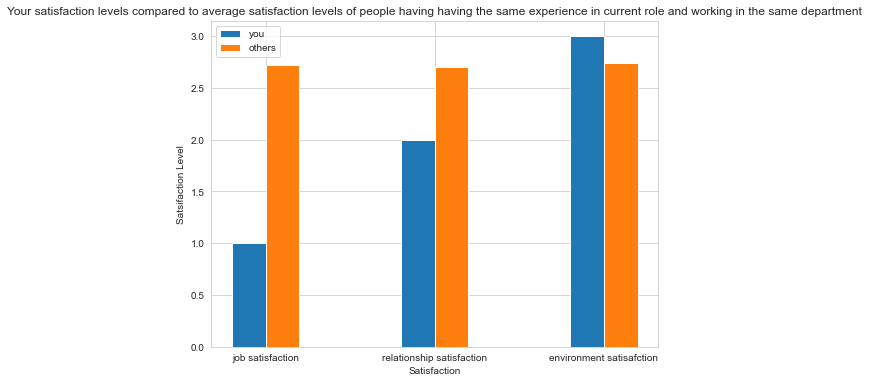

In [473]:
plot_satisfaction_years_at_comp_dep(1, 2, 3, 5, 1)

In [475]:
#Wykres pokazujący ile osób o podobnym stażu w firmie, pracującyh w tym samym departamencie robi nadgodziny
def plot_years_at_comp_overtime_dep(department: int, years_at_comp: int):
    for i in years_at_comp_list:
        if years_at_comp in i:
            years_at_comp_total = i
            
    df1 = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['Department'] == department)]
    
    if df1['OverTime'].count() > 0 and len(df1['OverTime'].unique()) == 2:
        print("Showing OverTime statistics for people with experience of work at company in same range and working in the same department")
        sns.displot(df1, x= 'YearsInCurrentRole', hue= 'OverTime', hue_order=[True, False])
    else:
        print("Not enough data for people with experience of work at company in same range and working in the same department. Showing general data for people with experience of work at company within the same range")
        sns.displot(x='YearsInCurrentRole', hue='OverTime', data=df[df['YearsInCurrentRole'] == years_in_curr_role], hue_order=[True, False])

Showing OverTime statistics for people with experience of work at company in same range and working in the same department


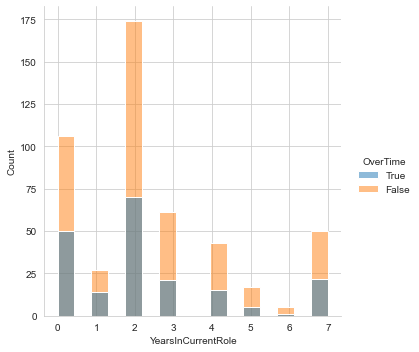

In [476]:
plot_years_at_comp_overtime_dep(1, 3)

In [479]:
# Porownanie Income dla Total Years At Company i na danym stanowisku

def plot_years_at_comp_salary_pos(s: int, years_at_comp: int, position: str):
    
    for i in years_at_comp_list:
        if years_at_comp in i:
            years_at_comp_total = i
    years_at_comp_dict = dict(df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position)]['MonthlyIncome'].describe())
            
    employees = years_at_comp_dict['count']
    less = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position) & (df['MonthlyIncome'] < s)]['MonthlyIncome'].count()
    more = df[(df['YearsAtCompany'] .between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position) & (df['MonthlyIncome'] > s)]['MonthlyIncome'].count()
    less_p = round(100 * less / employees, 2)
    more_p = round(100 * more / employees, 2)
    print(f'{less_p}% people working in the company for the range of {i} years and working on the same position {position} earn less than you, {more_p}% of them have higher monthly income.')
    
    var = st.variation(df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position)]['MonthlyIncome'])
    
    if var > 0.10 and years_at_comp_dict['count'] >= 15:
        
        if s <= years_at_comp_dict['25%']:
            salary = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position) & 
                        (df['MonthlyIncome'] <= years_at_comp_dict['25%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to first quartile.'
        elif s <= years_at_comp_dict['50%']:
            salary = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position) & 
                        (df['MonthlyIncome'] <= years_at_comp_dict['50%']) & (df['MonthlyIncome'] > years_at_comp_dict['25%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to second quartile.'
        elif s <= years_at_comp_dict['75%']:
            salary = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position) & 
                        (df['MonthlyIncome'] <= years_at_comp_dict['75%']) & (df['MonthlyIncome'] > years_at_comp_dict['50%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to third quartile.'
        else:
            salary = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position) & 
                        (df['MonthlyIncome'] > years_at_comp_dict['75%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to fourth quartile.'
        
  
        plt.subplots(figsize=(8, 10))
       
        plt.subplot(211)
        sns.histplot(data=salary, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(plot_title)
        
        plt.subplot(212)
        exp_salary = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position)]['MonthlyIncome']
        gen_title = print('Your monthly income compared to all of the employees working at the company for the same range of years and at the same position.')
        sns.histplot(data=exp_salary, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)
    
    else:
        print(f'Not enough employees in database to plot a comparison. Comparing now to all of the employees working in the company for the same range {i} years.')
        
        exp_salary = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right))]['MonthlyIncome']
        gen_title = 'Your salary compared to all of the employees with your experience.'
        sns.histplot(data=exp_salary, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)

99.59% people working in the company for the range of (32, 40] years and working on the same position Research Scientist earn less than you, 0.41% of them have higher monthly income.
Your monthly income compared to all of the employees working at the company for the same range of years and at the same position.


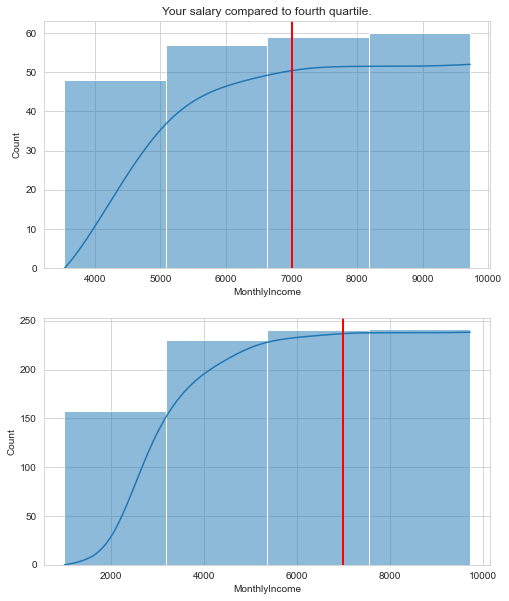

In [480]:
plot_years_at_comp_salary_pos(7000, 4, 'Research Scientist')

In [485]:
#wykres job level dla osób z danym doświadczeniem pracy w firmie i pracującyh na tym samym stanowisku

def plot_years_at_comp_job_level_pos(JL: int, years_at_comp: int, position: str):
    for i in years_at_comp_list:
        if years_at_comp in i:
            years_at_comp_total = i
            
    years_at_comp_dict = dict(df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position)]['JobLevel'].describe())
            
          
    employees = years_at_comp_dict['count']
    less = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position) & (df['JobLevel'] < JL)]['JobLevel'].count()
    more = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position) & (df['JobLevel'] > JL)]['JobLevel'].count()
    less_p = round(100 * less / employees,2)
    more_p = round(100 * more / employees,2)
    print(f'{less_p} % people having experience in their current role in range of {years_at_comp_total} years and working as {position} are on higher job level, {more_p}% of them works on lower job level.')
    
    var = st.variation(df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position)]['JobLevel'])
    
    if var > 0.1 and years_at_comp_dict['count'] >= 15:
        if JL <= years_at_comp_dict['25%']:
            job_lvl = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position) & 
                        (df['JobLevel'] <= years_at_comp_dict['25%'])]['JobLevel']
            plot_title = 'Your job level compared to first quartile.'
        elif JL <= years_at_comp_dict['50%']:
            job_lvl = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position) & 
                        (df['JobLevel'] <= years_at_comp_dict['50%']) & (df['JobLevel'] >years_at_comp_dict['25%'])]['JobLevel']
            plot_title = 'Your job level compared to second quartile.'
        elif JL <= years_at_comp_dict['75%']:
            job_lvl = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position) & 
                        (df['JobLevel'] <=years_at_comp_dict['75%']) & (df['JobLevel'] > years_at_comp_dict['50%'])]['JobLevel']
            plot_title = 'Your job level compared to third quartile.'
        else:
            job_lvl = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position) & 
                        (df['JobLevel'] > years_at_comp_dict['75%'])]['JobLevel']
            plot_title = 'Your job level compared to fourth quartile.'
        
  
        plt.figure(figsize=(6, 4))
        sns.set_style('whitegrid')
        sns.countplot(x='JobLevel', data=df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position)], palette='cool')
        plt.title(f'Job Level across employees working for {years_at_comp} years in company as {position}.')
        
    else:
        plt.figure(figsize=(6, 4))
        sns.set_style('whitegrid')
        sns.countplot(x='JobLevel', data=df[df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)], palette='cool')
        print(f'Sorry, we do not have enough data to plot job level statistics for your department.\nNow showing general statistics for employees working for {i} years in current role.')
    plt.show()

87.97 % people having experience in their current role in range of (0, 8] years and working as Research Scientist are on higher job level, 0.41% of them works on lower job level.


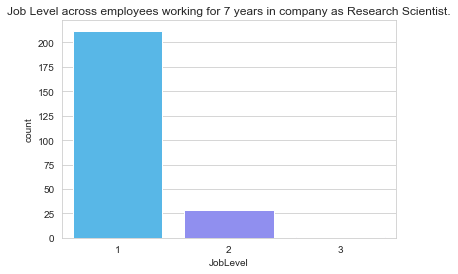

In [484]:
plot_years_at_comp_job_level_pos(2, 7, 'Research Scientist')

In [486]:
#Poziomy staysfakcji dla pracowników o tym samym stażu w firmie i pracujących na tym samym stanowisku

def plot_satisfaction_years_at_comp_pos(js: int, rs: int, es:int, years_at_comp: int, position: str):
    for i in years_at_comp_list:
        if years_at_comp in i:
            years_at_comp_total = i
            
    dfc = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position)]
    job_sat_col = dfc['JobSatisfaction'].mean()
    relationship_sat_col = dfc['RelationshipSatisfaction'].mean()
    environment_sat_col = dfc['EnvironmentSatisfaction'].mean()
    
    job_sat_you = js
    relationship_sat_you = rs
    environment_sat_you = es     
    
    if len(dfc) >2:
        plt.figure(figsize=(8, 6))   
        w=0.2
        x = ['job satisfaction', 'relationship satisfaction', 'environment satisafction']
        you = [job_sat_you, relationship_sat_you, environment_sat_you]
        others = [job_sat_col, relationship_sat_col, environment_sat_col]
          
        bar1 = np.arange(len(x))
        bar2 = [i+w for i in bar1]

        plt.bar(bar1, you, w, label= 'you')
        plt.bar(bar2, others, w, label='others')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        plt.ylabel('Satsifaction Level')
        plt.xlabel('Satisfaction')
        plt.title('Your satisfaction levels compared to average satisfaction levels of people having having the same experience of working at the company and being hired on the same position')
        plt.xticks(bar1+w/2, x)
        plt.legend()
        plt.show()
    else:
        print('Not enough data to show comparison')

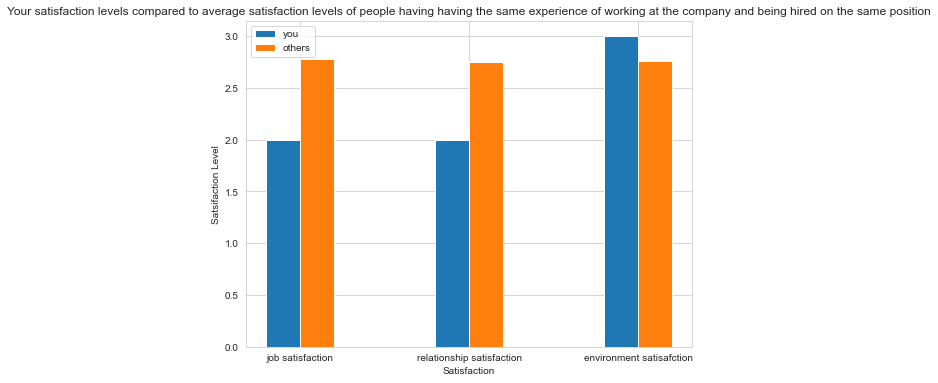

In [488]:
plot_satisfaction_years_at_comp_pos(2,2,3, 7, 'Research Scientist')

In [489]:
#Wykres pokazujący ile osób o podobnym stażu w firmie, pracującyh na tym samym stabowisku robi nadgodziny
def plot_years_at_comp_overtime_pos(position: str, years_at_comp: int):
    for i in years_at_comp_list:
        if years_at_comp in i:
            years_at_comp_total = i
            
    df1 = df[(df['YearsAtCompany'].between(years_at_comp_total.left, years_at_comp_total.right)) & (df['JobRole'] == position)]
    
    if df1['OverTime'].count() > 0 and len(df1['OverTime'].unique()) == 2:
        print("Showing OverTime statistics for people with experience of work at company in same range and working at the same position")
        sns.displot(df1, x= 'YearsInCurrentRole', hue= 'OverTime', hue_order=[True, False])
    else:
        print("Not enough data for people with experience of work at company in same range and working on the same position. Showing general data for people with experience of work at company within the same range")
        sns.displot(x='YearsInCurrentRole', hue='OverTime', data=df[df['YearsInCurrentRole'] == years_in_curr_role], hue_order=[True, False])

Showing OverTime statistics for people with experience of work at company in same range and working at the same position


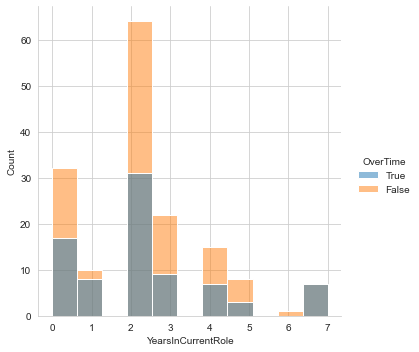

In [490]:
 plot_years_at_comp_overtime_pos('Research Scientist', 7)